In [1]:
import torch
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
t_c = torch.tensor([0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]) # in celcius
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]) # in unknown unit

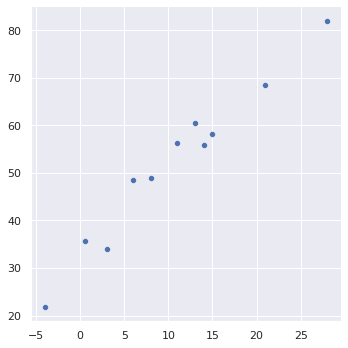

In [3]:
# We want a scatter plot. The relational plot function is more general, and uses a scatter plot as default
sns.relplot(x=t_c, y=t_u)

<AxesSubplot:>

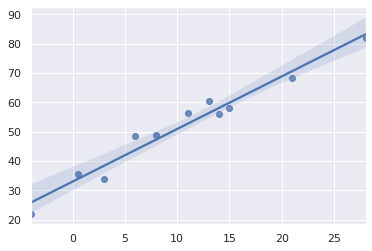

In [4]:
# plotting the regression line along with a 95% confidence interval
# for some reason, doesn't work well with tensors
sns.regplot(x=t_c.numpy(), y=t_u.numpy())

We'll assume a linear model at first.
`t_c = w * t_u + b`

analogous to
`y = mx + c`

but the slope is called the weight, and the intercept is called the bias

In [8]:
# define the model
def model(t_u, w, b):
    return t_u * w + b

def loss_fn(t_u, t_p):
    sq_diff = (t_u - t_p)**2 # this is a tensor, we need a mean to get a single number 
    return sq_diff.mean() # mean square loss


In [14]:
# w and b are scalars. And scalars are zero-dimensional tensors.
w = torch.ones(()) # just tensor(1.)
b = torch.zeros(()) # tensor(0.)
# predicted tensor
t_p = model(t_u, w, b)
loss_p = loss(t_u, t_c)
print(f"Predicted tensor is {t_p} with a loss of {loss_p}")


Predicted tensor is tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000]) with a loss of 1763.884765625
